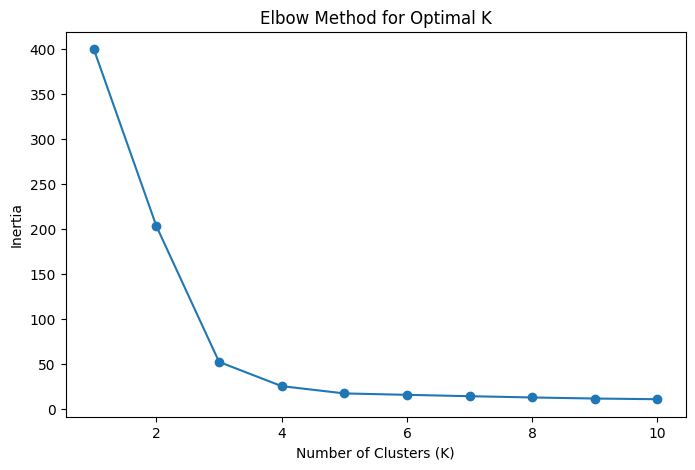

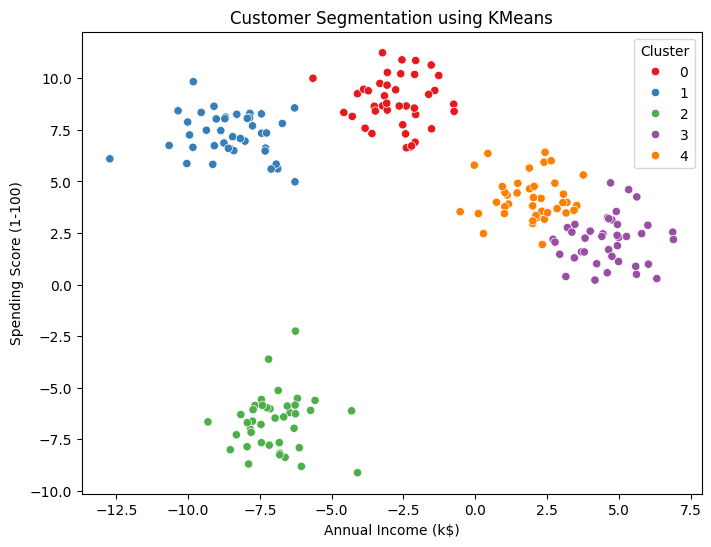

✅ Code executed successfully without any errors


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X_data, _ = make_blobs(
    n_samples=200,
    centers=5,
    cluster_std=1.2,
    random_state=42
)

df = pd.DataFrame(
    X_data,
    columns=['Annual Income (k$)', 'Spending Score (1-100)']
)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title("Customer Segmentation using KMeans")
plt.show()

df.to_csv("segmented_customers.csv", index=False)
print("✅ Code executed successfully without any errors")
